In [48]:
library(dplyr)   
library(caret)
library(tidyverse)
library(recipes)
library(pROC)
library(caTools)
library(Metrics)
library(rsq)

options(repr.plot.width = 20, repr.plot.height =10, repr.plot.res = 100)


load(file = "C:/Users/abonini/Desktop/Analysis/Sources/LIVERTRANSPLANT/Modello/df_num.Rdata")

# Feature selection

In [49]:
library(leaps)

Best_Subset <-
    regsubsets(degenzaPostTraOSP~.,
               data =df_num,
               nbest = 1,      # 1 best model for each number of predictors
               nvmax = NULL,    # NULL for no limit on number of variables
               force.in = NULL, force.out = NULL,
               method = "exhaustive")
summary_best_subset <- summary(Best_Subset)

which.max(summary_best_subset$adjr2)

[1] 18

In [50]:
tmp <- summary_best_subset$which[18,]

tmp

(Intercept)                      age            degenzaPreTra 
                    TRUE                    FALSE                     TRUE 
                Sodiemia            ratioPaO2FiO2         platCountTranspl 
                    TRUE                     TRUE                     TRUE 
                albumina          surgeryDuration IntraoperativTransfected 
                   FALSE                     TRUE                     TRUE 
            plasmaFresco              plasmaPools           doseFibrinogen 
                    TRUE                     TRUE                    FALSE 
        CRIOprecipitated         CristalloidiComp           Albumina50Comp 
                    TRUE                     TRUE                     TRUE 
  noradrenalineEndSurger         intermedLactates             coldIschemia 
                    TRUE                     TRUE                    FALSE 
           organDonorAge         organDonorHeight organDonorDrawalSodiemia 
                    TRUE                     TRUE                     TRUE 
       organDonorGammaGT                 realMELD 
                    TRUE                     TRUE

In [51]:
df_num_select <- subset(df_num, select= c(degenzaPreTra,Sodiemia,ratioPaO2FiO2,platCountTranspl,surgeryDuration,IntraoperativTransfected,plasmaFresco,plasmaPools,CRIOprecipitated,CristalloidiComp,Albumina50Comp,noradrenalineEndSurger,intermedLactates,organDonorAge,organDonorHeight,organDonorDrawalSodiemia,organDonorGammaGT,realMELD,degenzaPostTraOSP))

In [52]:
dim(df_num_select)

[1] 1068   19

# Data partition

In [53]:
#make this example reproducible
set.seed(1)

#use 70% of dataset as training set and 30% as test set
sample <- sample.split(df_num$degenzaPostTraOSP, SplitRatio = 0.7)
train  <- subset(df_num, sample == TRUE)
test   <- subset(df_num, sample == FALSE)


In [54]:
#make this example reproducible
set.seed(1)

#use 70% of dataset as training set and 30% as test set
sample_select <- sample.split(df_num_select$degenzaPostTraOSP, SplitRatio = 0.7)
train_select  <- subset(df_num_select, sample_select == TRUE)
test_select   <- subset(df_num_select, sample_select == FALSE)


# Model

In [55]:
ctrl <- trainControl(method = "cv",
                              number = 10,
                             savePrediction="final",verboseIter=TRUE,returnResamp="all")



In [56]:
ctrl <- trainControl(method = "cv", 
                 savePredictions = "final",verboseIter=TRUE, search = "random") 

In [57]:
lm <- train(degenzaPostTraOSP ~ ., data = train,
               method = "lm",
               trControl = ctrl)

+ Fold01: intercept=TRUE 
- Fold01: intercept=TRUE 
+ Fold02: intercept=TRUE 
- Fold02: intercept=TRUE 
+ Fold03: intercept=TRUE 
- Fold03: intercept=TRUE 
+ Fold04: intercept=TRUE 
- Fold04: intercept=TRUE 
+ Fold05: intercept=TRUE 
- Fold05: intercept=TRUE 
+ Fold06: intercept=TRUE 
- Fold06: intercept=TRUE 
+ Fold07: intercept=TRUE 
- Fold07: intercept=TRUE 
+ Fold08: intercept=TRUE 
- Fold08: intercept=TRUE 
+ Fold09: intercept=TRUE 
- Fold09: intercept=TRUE 
+ Fold10: intercept=TRUE 
- Fold10: intercept=TRUE 
Aggregating results
Fitting final model on full training set


In [58]:
lm_select <- train(degenzaPostTraOSP ~ ., data = train_select,
               method = "lm",
               trControl = ctrl)

+ Fold01: intercept=TRUE 
- Fold01: intercept=TRUE 
+ Fold02: intercept=TRUE 
- Fold02: intercept=TRUE 
+ Fold03: intercept=TRUE 
- Fold03: intercept=TRUE 
+ Fold04: intercept=TRUE 
- Fold04: intercept=TRUE 
+ Fold05: intercept=TRUE 
- Fold05: intercept=TRUE 
+ Fold06: intercept=TRUE 
- Fold06: intercept=TRUE 
+ Fold07: intercept=TRUE 
- Fold07: intercept=TRUE 
+ Fold08: intercept=TRUE 
- Fold08: intercept=TRUE 
+ Fold09: intercept=TRUE 
- Fold09: intercept=TRUE 
+ Fold10: intercept=TRUE 
- Fold10: intercept=TRUE 
Aggregating results
Fitting final model on full training set


In [35]:
lm

Linear Regression 

751 samples
 22 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 675, 676, 676, 677, 677, 677, ... 
Resampling results:

  RMSE       Rsquared   MAE     
  0.6602296  0.1949236  0.490026

Tuning parameter 'intercept' was held constant at a value of TRUE

In [36]:
lm_select

Linear Regression 

751 samples
 18 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 675, 676, 676, 677, 676, 675, ... 
Resampling results:

  RMSE       Rsquared   MAE     
  0.6510189  0.2135262  0.485421

Tuning parameter 'intercept' was held constant at a value of TRUE


Call:
summary.resamples(object = results)

Models: lm, lm_select 
Number of resamples: 10 

MAE 
               Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
lm        0.4058366 0.4862876 0.4962966 0.4885828 0.5164900 0.5306699    0
lm_select 0.4387429 0.4528131 0.4856959 0.4870407 0.5047973 0.5695767    0

RMSE 
               Min.   1st Qu.    Median      Mean   3rd Qu.     Max. NA's
lm        0.4964046 0.6133633 0.6406510 0.6570783 0.7158411 0.802030    0
lm_select 0.5680442 0.6121977 0.6405684 0.6563793 0.7015531 0.794602    0

Rsquared 
                Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
lm        0.03105588 0.1422349 0.1705611 0.2166515 0.2775007 0.4381611    0
lm_select 0.09885885 0.1567431 0.1874495 0.2056562 0.2627900 0.3271213    0


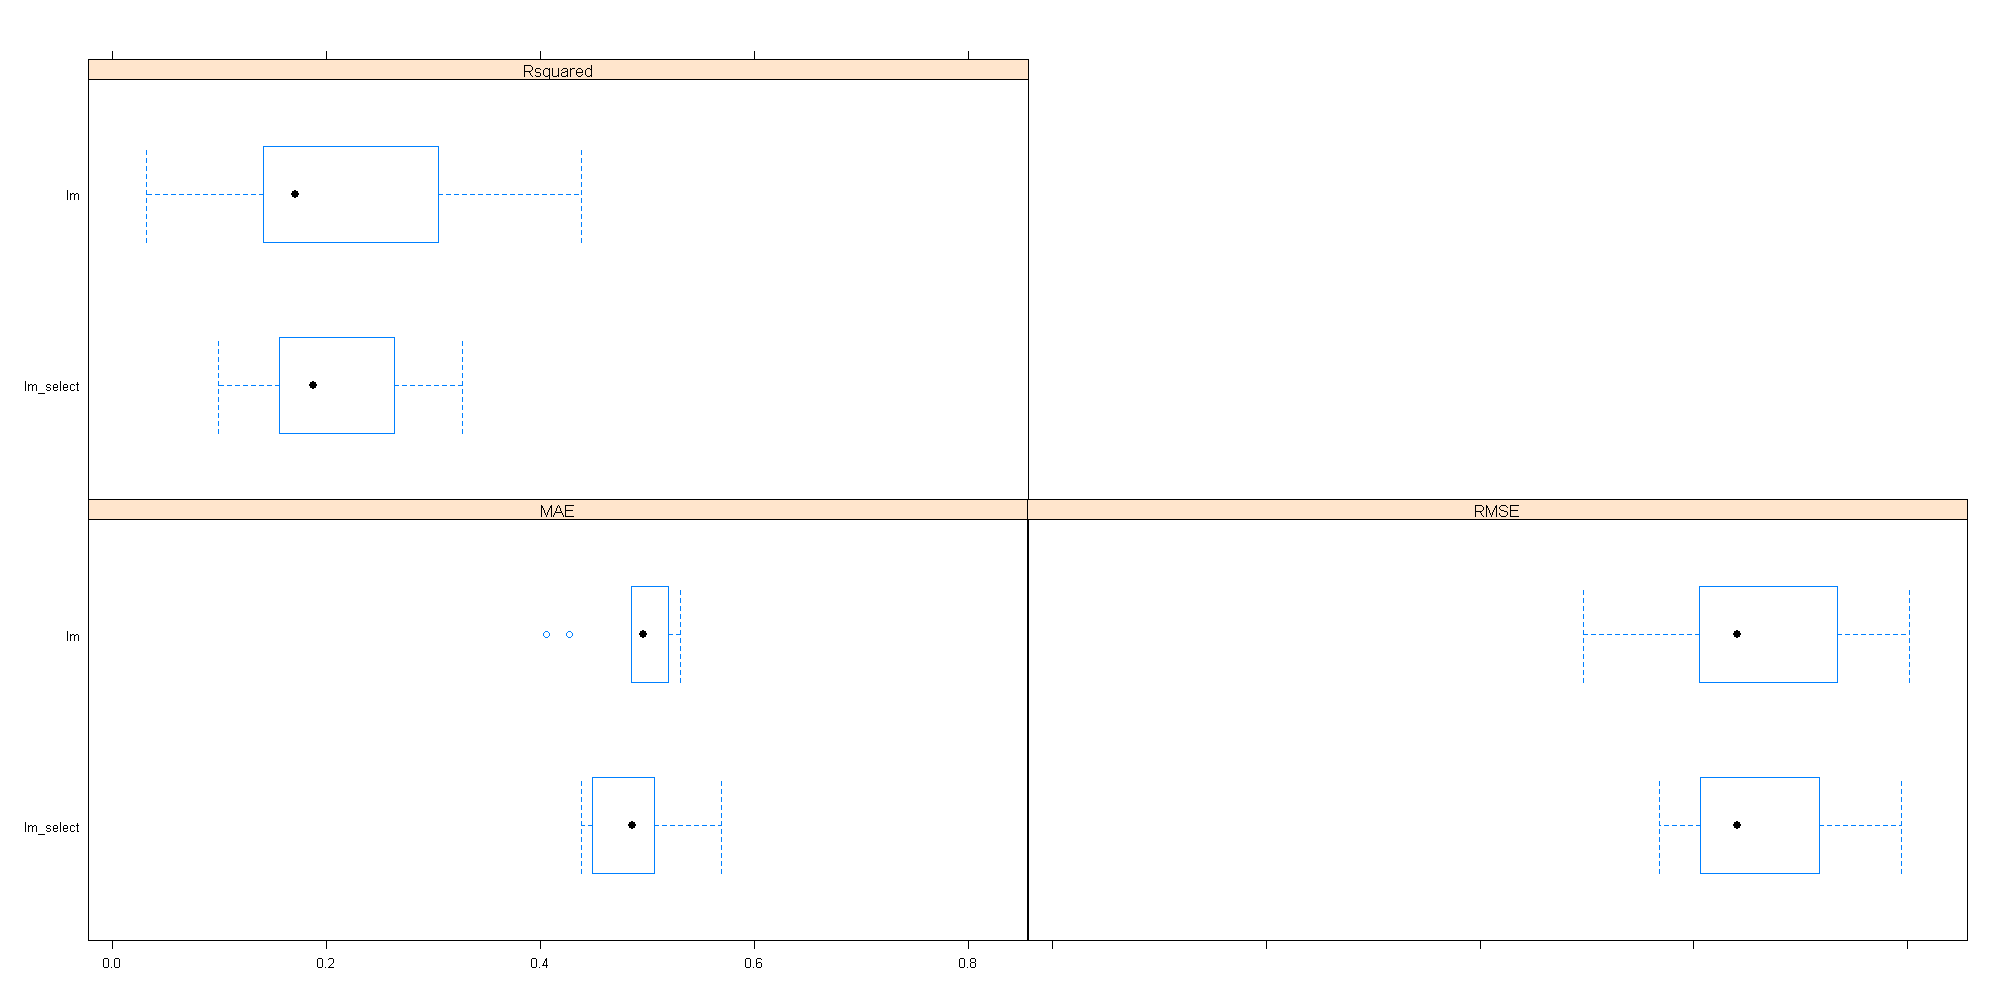

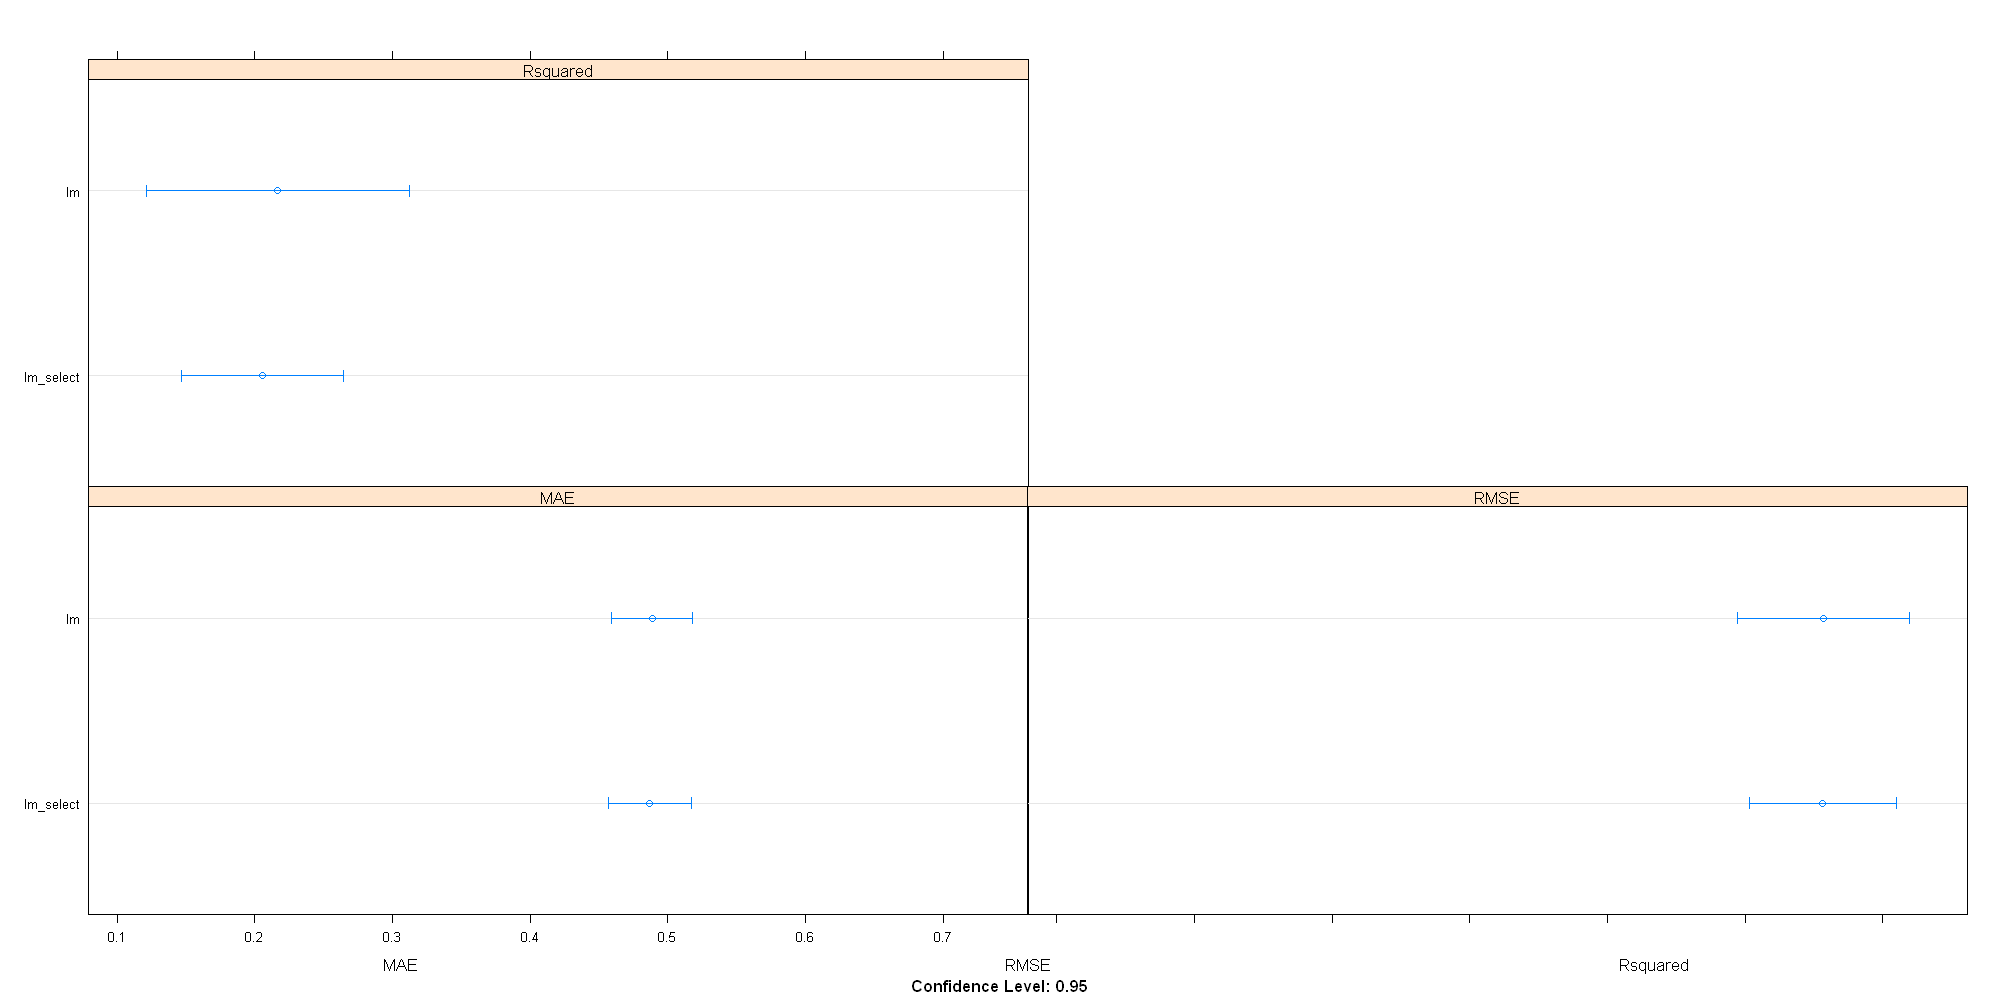

In [60]:
# collect resamples
results <- resamples(list(lm=lm,  lm_select=lm_select))
# summarize the distributions
summary(results)
# boxplots of results
bwplot(results)
# dot plots of results
dotplot(results)

lm variable importance

                         Overall
realMELD                  100.00
intermedLactates           71.47
noradrenalineEndSurger     69.87
surgeryDuration            62.82
degenzaPreTra              58.65
plasmaFresco               49.87
organDonorDrawalSodiemia   46.40
plasmaPools                42.23
ratioPaO2FiO2              41.00
Albumina50Comp             37.97
IntraoperativTransfected   37.35
CRIOprecipitated           30.92
CristalloidiComp           24.16
Sodiemia                   18.30
organDonorHeight           12.04
organDonorGammaGT          10.23
organDonorAge               4.32
platCountTranspl            0.00

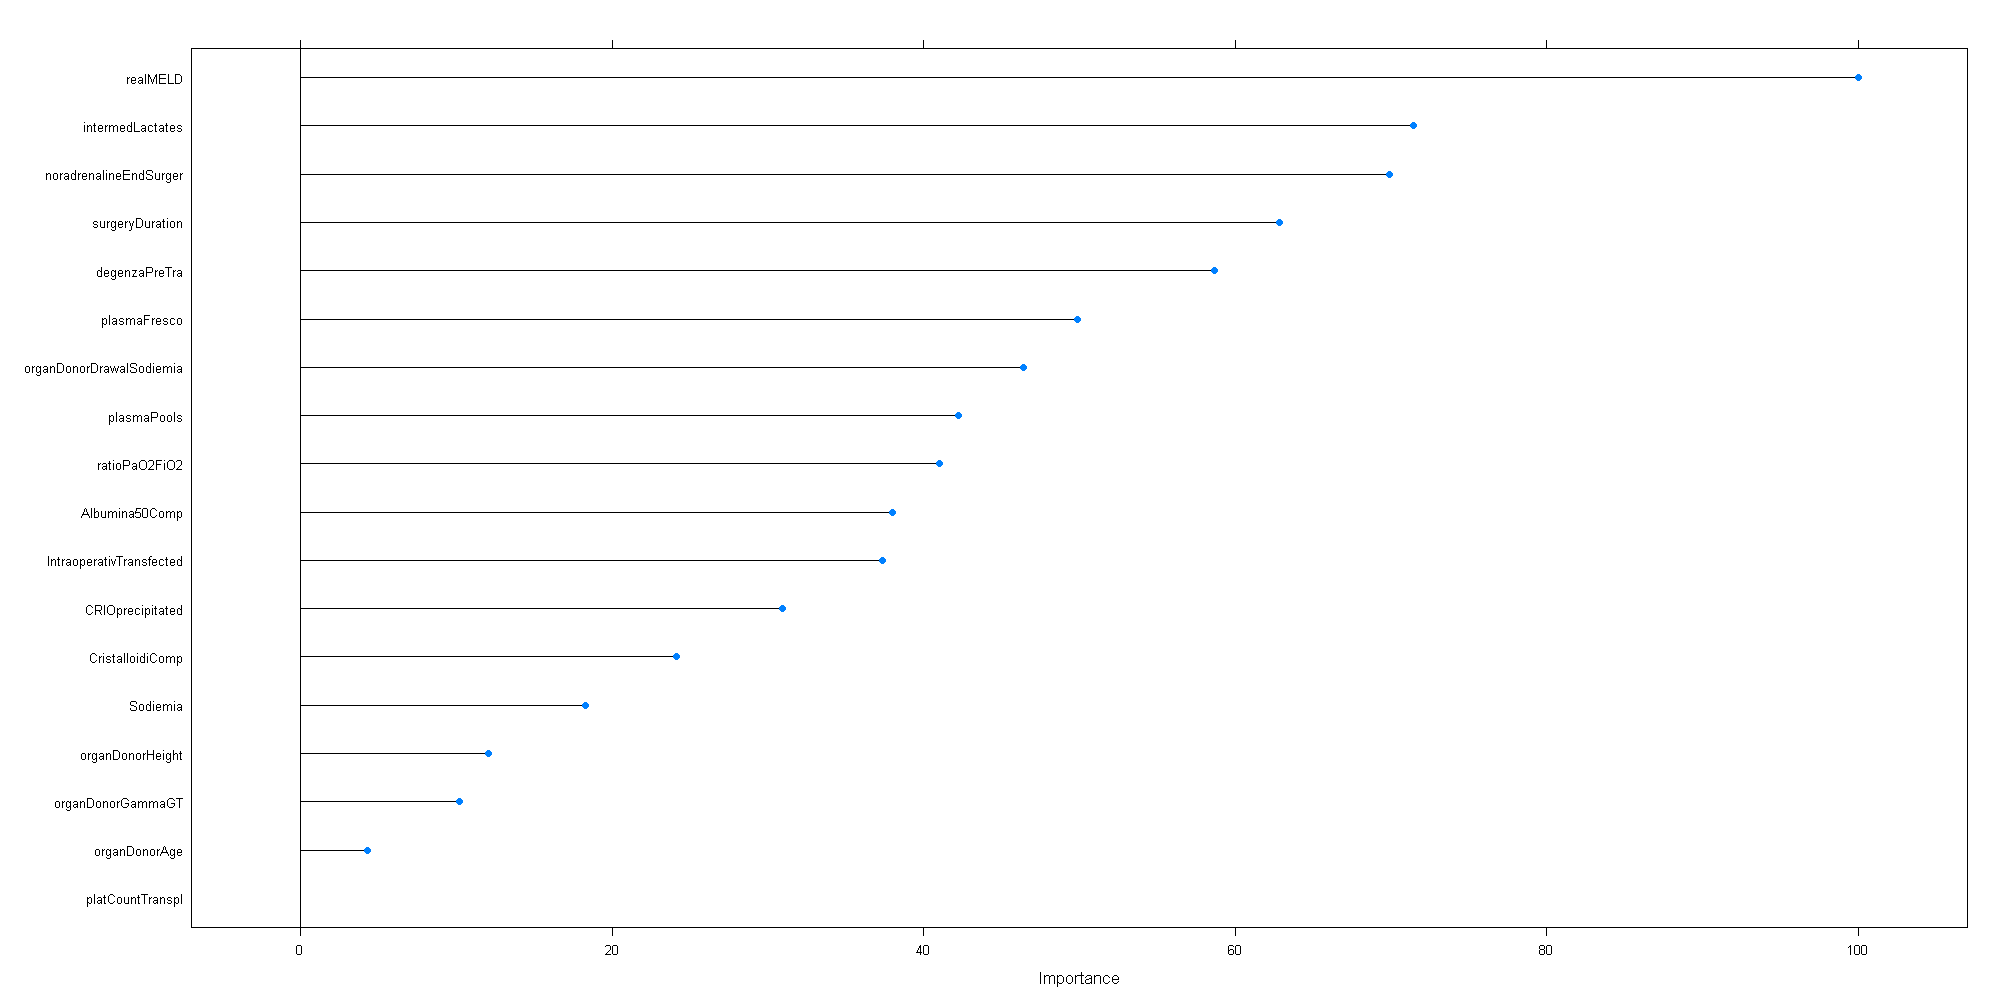

In [61]:
vimp <- varImp(lm_select)
vimp
plot(vimp)

In [62]:
test_select$predicted <- predict(lm_select, newdata = test_select)
cor(test_select$degenzaPostTraOSP ,test_select$predicted)

[1] 0.5284774

In [63]:
rmse(test_select$degenzaPostTraOSP, test_select$predicted)

[1] 0.5570333

In [64]:
rsq(test_select$degenzaPostTraOSP, test_select$predicted) #non capisco l'erore

Warning message in rsq(test_select$degenzaPostTraOSP, test_select$predicted):
"Unsupported object!"


function (fitObj, adj = FALSE, type = c("v", "kl", "sse", "lr", 
    "n")) 
{
    if (is(fitObj, "glm") | is(fitObj, "glmerMod")) {
        type <- type[[1]]
        rsq <- switch(type, v = rsq.v(fitObj, adj = adj), kl = rsq.kl(fitObj, 
            adj = adj), sse = rsq.sse(fitObj, adj = adj), lr = rsq.lr(fitObj, 
            adj = adj), n = rsq.n(fitObj, adj = adj))
    }
    else if (is(fitObj, "glmmPQL")) 
        warning("Unsupported object!")
    else if (is(fitObj, "lmerMod") | is(fitObj, "lme")) 
        rsq <- rsq.lmm(fitObj, adj = adj)
    else if (is(fitObj, "lm")) 
        rsq <- ifelse(adj, summary(fitObj)$adj.r.squared, summary(fitObj)$r.squared)
    else warning("Unsupported object!")
    rsq
}
<bytecode: 0x00000000296b31f0>
<environment: namespace:rsq>

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



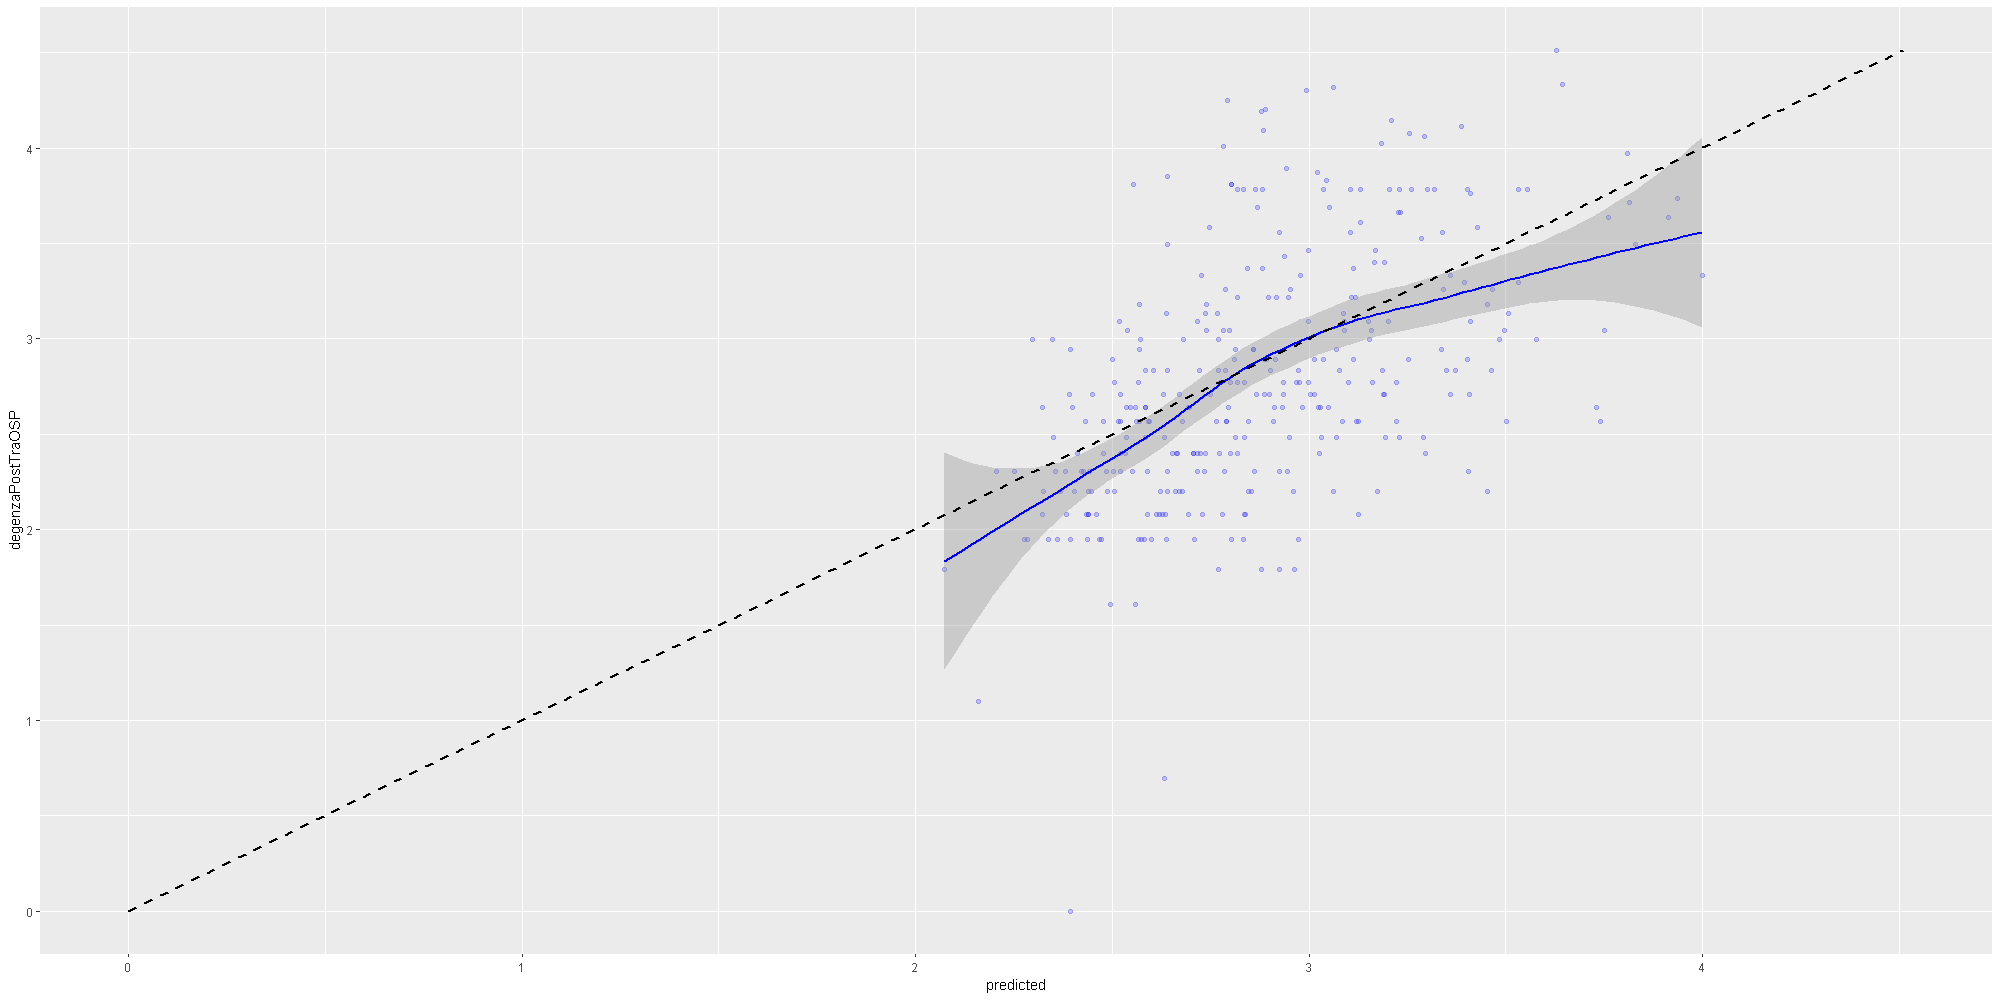

In [65]:
#predicted vs actual

ggplot(data = test_select, aes(x = predicted, y = degenzaPostTraOSP)) +
  geom_point(alpha = 0.2, color = "blue") +
  geom_smooth(aes(x = predicted,
                  y = degenzaPostTraOSP), color="blue") +
  geom_line(aes(x = degenzaPostTraOSP,
                y = degenzaPostTraOSP), color = "black", 
            linetype = 2, size = 1)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



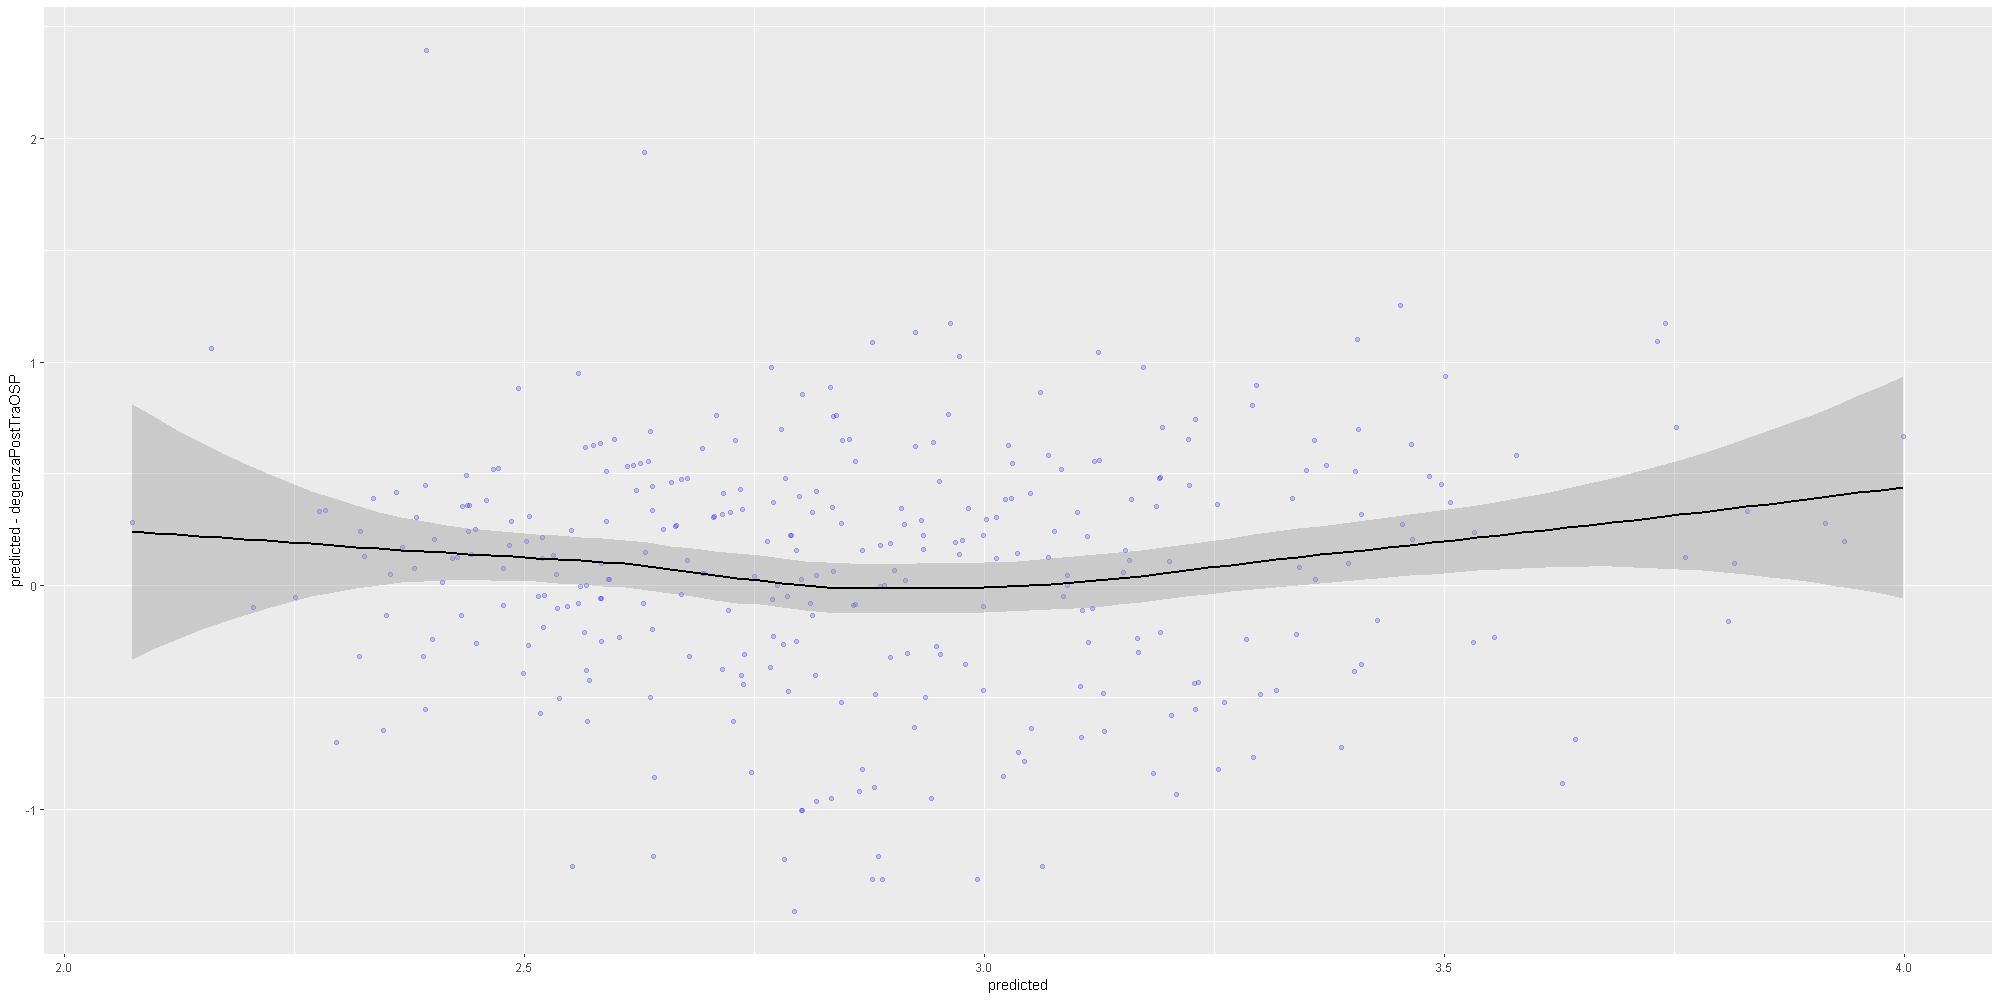

In [66]:
# residuals

ggplot(data = test_select, aes(x = predicted,
                      y = predicted - degenzaPostTraOSP)) +
  geom_point(alpha = 0.2, color = "blue") +
  geom_smooth(aes(x = predicted,
                  y = predicted - degenzaPostTraOSP),
              color="black")